In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')

import os
import time
from IPython.core.display import clear_output
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import lmfit
import functools


/tmp/ipykernel_66484/3684248927.py:9: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import clear_output


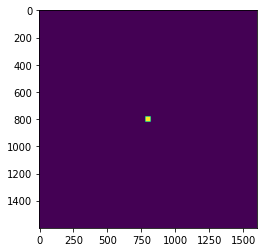

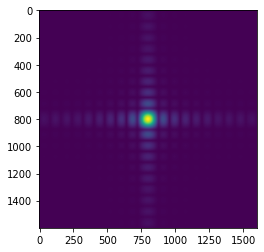

In [5]:
dim = (1600, 1600)
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

x = np.linspace(-50, 50, dim[0]) * um
y = np.linspace(-50, 50, dim[0]) * um
X, Y = np.meshgrid(x, y) 
z = 3 * cm # distance from the meta to camera
d = 0.1 * mm # meta aperture
lam = 660 * nm # wavelength
k = 2 * np.pi / lam # wave number

A = np.zeros(dim)
A[(abs(X) < d/2) & (abs(Y) < d/2)] = 1

plt.imshow(A)
plt.show()

Ak = np.fft.fft2(A) # kernel

kx = np.fft.fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi
ky = np.fft.fftfreq(len(y), np.diff(y)[0]) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)

H = np.exp(1j * z * np.sqrt(k**2 - np.abs(KX)**2 - np.abs(KY)**2))
E = np.fft.ifft2(Ak * H)

plt.imshow(np.abs(E))
plt.show()
